Features used: ['Strength_7', 'Rainfall_Code', 'AvgTemp_0to28', 'GDD_28', 'TotalRainfall_28', 'AvgHumidity_28']

   28-DAY STRENGTH MODEL (MLR)
   > R² Score:   0.1321
   > MAE:        1.5526 MPa
   > MSE:        4.2837
   > RMSE:       2.0697 MPa
   > MAPE:       4.23%
------------------------------


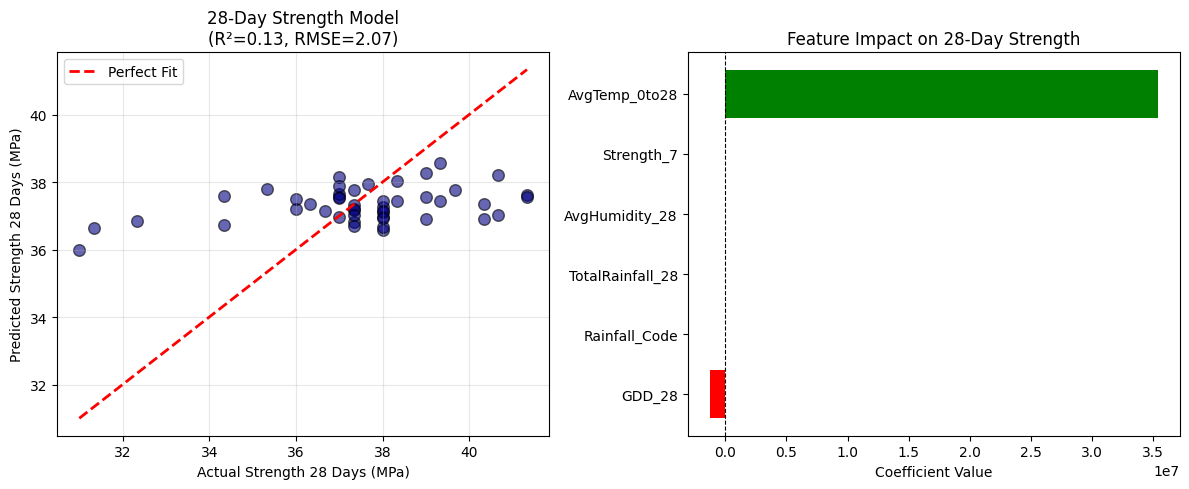

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# --- 1. LOAD DATA ---
df_local = pd.read_csv("Data/localdataset.csv")
df_local.columns = df_local.columns.str.strip()

# --- 2. DEFINE FEATURES FOR 28-DAY MODEL ---
# We use ingredients + 28-day weather + KNOWN 7-day strength
features_28d = [
    # Ingredients
    'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 
    'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age',
    
    # Measured Early Strength (The most powerful predictor)
    'Strength_7',
    
    # Environmental Factors (Casting Day)
    'Rainfall_Code', 
    
    # Environmental Factors (Curing Period 0-28 Days)
    'AvgTemp_0to28', 
    'GDD_28', 
    'TotalRainfall_28', 
    'AvgHumidity_28'
]

# Select only columns that exist in the file
available_cols = [c for c in features_28d if c in df_local.columns]
print(f"Features used: {available_cols}")

X = df_local[available_cols]
y = df_local['Strength_28']

# --- 3. TRAIN MODEL ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_28 = LinearRegression()
model_28.fit(X_train, y_train)

# --- 4. PREDICT & EVALUATE ---
predictions = model_28.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

# Print Report
print("\n" + "="*40)
print("   28-DAY STRENGTH MODEL (MLR)")
print("="*40)
print(f"   > R² Score:   {r2:.4f}")
print(f"   > MAE:        {mae:.4f} MPa")
print(f"   > MSE:        {mse:.4f}")
print(f"   > RMSE:       {rmse:.4f} MPa")
print(f"   > MAPE:       {mape:.2%}")
print("-" * 30)

# --- 5. VISUALIZATION ---
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, color='navy', alpha=0.6, edgecolors='k', s=70)
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Strength 28 Days (MPa)")
plt.ylabel("Predicted Strength 28 Days (MPa)")
plt.title(f"28-Day Strength Model\n(R²={r2:.2f}, RMSE={rmse:.2f})")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Coefficients
plt.subplot(1, 2, 2)
coefficients = model_28.coef_
indices = np.argsort(coefficients)

plt.title('Feature Impact on 28-Day Strength')
colors = ['green' if c > 0 else 'red' for c in coefficients[indices]]
plt.barh(range(len(indices)), coefficients[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [available_cols[i] for i in indices])
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()

plt.show()